# Barcode mapping of test run

In [1]:
using wgregseq, CSV, DataFrames, Glob, BioSequences, CairoMakie

wgregseq.plotting_style.default_makie!()

Find local path.

In [4]:
# Set path
dir = @__DIR__
home_dir = joinpath(split(dir, "/")[1:end-3])
exp_dir = joinpath(split(dir, "/")[end])

"20220415_mapping_test"

Import barcodes from sequences.

In [5]:
files = glob("../../../data/barcodes/$exp_dir/*_merged_barcodes.txt")

df = DataFrame()
for file in files
    _df = CSV.read(file, DataFrame, header=["barcode", "promoter"])
    insertcols!(_df, 2, :group => split(split(file, '/')[end], '_')[1])
    append!(df, _df)
end

df.promoter = map(x -> reverse_complement(LongDNA{4}(x)), df.promoter)
first(df, 5)

,barcode,group,promoter
,String31,SubStrin…,LongSequ…
1,TTGCCCGGAGGATGGGAGAT,100,TCGTACATGTTTGTAGATATGTAGTTTGCCTTCTTTACATATCTCGATGCGTGTGGTCAGCCGTGGCCTGACAGTTTTGCCAAAGCCCTGACTAACGGGAACGAACTGATTAGCCGCAACTTTGGCGGGAAATTCGAGCTTCTGGAAGGCGGTTTCAAAG
2,TCCTGACACTAGCATGGGTT,100,CTAGACATCAACTATCTCGGCAACTCTATCTATCGCGCTGCCACCGAATTTTTCTTCGCTTACGAAAAATAATCAGATTCCCATCAGTTTGGGCGATGTTGTCTATTATTAATTTACTATAGGCATACATAATTAACATTACCTAAAAGGAAGACGTTGT
3,GTTAACTGCAGTTTTCATGG,100,TTGCCAGGATCTCAACTAGGCGGAGATGAAAATGCGGAACTCCATGCCATCGGCTATTATGCGCTCTTTGTAGACACAGTACCGGATAGTGTTAAGAGGTTTTTTACTGAAGCAGCAACCATTGACTTTGCTGCGTTAGCCCAAGCGGCCCATCGTCTTA
4,CATCGTGCGTGGGAAGTATT,100,TCACCGACATACGTTGTTATGTAAGAAGTCAAGCAGAGTAATCGGCTGGTTATCAGGACGCGCTAACACGGAACAGGTGCAAAATCGGGGTTGTATGATTACACTCCTGTTAGGCTATACAACAACAGTAATGGGGTAACCTGGGATTGTTGTCCGTTTT
5,TGTTATATGTGGTTGGCCGC,100,TCTGTCTCTTTTCAACGATCGTGATTTTCTGATTCAGACTGCAAACATGCGTCATGGGGAGTAAATCAAGGTAAAGTCATGTATTATCCACGTCTGATGACATAATTTCTCCCTGGGAGGTATTTAAACAATGAATAAAAGCTTGTTAGTTGAGAATGAC


Show how many reads were found for each group.

In [6]:
display(combine(groupby(df, "group"), nrow))
println("Total reads: $(combine(groupby(df, "group"), nrow)[!, "nrow"] |> sum)")

,group,nrow
,SubStrin…,Int64
1,100,437403
2,110,43403
3,201,96467
4,204,50667


Total reads: 627940


In [7]:
df_seqs = CSV.read("../../../data/twist_orders/2022-02-15_twist_order.csv", DataFrame)
df_seqs.sequence = LongDNA{4}.(df_seqs.sequence)
insertcols!(df_seqs, 2, :promoter_seq => [x[27:186] for x in df_seqs.sequence])
first(df_seqs, 5)

,genes,promoter_seq
,String,LongSequ…
1,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTTTGTGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACAAGCGATGCAAGGAATCGAACATGAAGATCGTAAAGG
2,"[""rspA"", ""rspB""]",TCTGATCTTTTGTAAATCATTCACAGTGCAAATTTAAGTCTTTTTTTGTGATCACTCCGGCTATATTCGATCTATTTACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCGTCACGACAAGCGACGCAGGGAATCGAATATGAAGATCGTAAAGG
3,"[""rspA"", ""rspB""]",TTTCATCTTTTCTCAACCACTCACAGCGTAAACTTACGCCTGTTTGTGTGATCACTACGGCGTTTTTCAATCTTTATACTTGTATGGTAGTCTCTCAGTTGCGTAGATTTGCTGCATCACGACAAGCGATGCATGGAATCGAACATGAAGGTCGTAAAGG
4,"[""rspA"", ""rspB""]",GTTCATCCTTCTTCAACCATTCACAGCGGAAATATACGCCTTTTCTCGAGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTGAGTTGTGTAGTTTTCATGCATCACAACACGCGATGCAAGGAATGAAACATGAGGATCGTAAAGG
5,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACCGCGCAAATATACGCCTTCTTTTGTGATCACTCAGGCTCTTTTCGATCTTTCTACTAGTATGGTAATAGCTAATTTGCGTGGATTGCATGCATCACGACAAGCATTGCAAGGAATCGAACACGAAGATCCTTAAGG


In [8]:
sequence_dict = Dict(df_seqs.promoter_seq .=> df_seqs.name)

Dict{LongSequence{DNAAlphabet{4}}, String} with 178612 entries:
  CCGGCGATCCGTCGTGACATAGCGGTGGTGGTAGCAG… => "ihfAp4_376"
  CTGTTTTATAATAACTTAATCGCGCATAAAAAAAGGC… => "galEp_664"
  AACAAAATCAAACGTTGAGCATAGTCCTTCCCCTTCC… => "yacCp_1339"
  GGGCGCTGATCGAACGTGGACGTGGTTTGCGTAGCTA… => "yadI_predicted_639"
  GTTCAAATTTACAGACAAATATATTTGCGTCAACACC… => "intE_xisE_ymfH_predicted_825"
  TGTCCTGAGAAGTTTTTGCAGTCCCGGCCTTTCGGAC… => "tfaE_stfE_predicted_518"
  TGGCCTGCCCCCTCATCTTATTTCTGGTACTTAGGAG… => "ygeW_predicted_144"
  TATTCAATGTCCAGTTGCGTATCATTTATATGTTTTT… => "xdhAp2_1117"
  CGGACCGTTTCCAGAGGCTGCACCTCGACGCTTGCAG… => "ssnAp_1394"
  ATCTGGAGAACGATCTTGTATTAAGAAGTACCCGTTC… => "yadL_yadM_yadC_yadK_predicted_1360"
  AAAATTATTCATTTTCATCCCTTTCATTTAATCAGTT… => "uacT_predicted_395"
  GGCTTCTCTATCGAGTGGCCCTTTTTTTGCCTTTCAC… => "gatYp_1314"
  CCGGCGAACCGCCAAGACATCGCAATGGTGGACTTAG… => "ihfAp4_1483"
  AGGACCGTTTCCAGACCCTCCACCTCGGCGCTTACTT… => "ssnAp_808"
  ATTCTGAAGGGGCAAGATCAATTTATGTATACCCTTC… => "sulAp_827"
  C

In [9]:
name_list = String[]
for i in 1:nrow(df)
    try
        push!(name_list, sequence_dict[df.promoter[i]])
    catch e
        push!(name_list, "None")
    end
end

In [10]:
name_list |> unique

146525-element Vector{String}:
 "None"
 "araCp_1488"
 "acrAp_858"
 "ompRp4_359"
 "acrBp_946"
 "rcsDp_231"
 "ihfAp4_305"
 "mtnp2_681"
 "cpxRp2_69"
 "ftsKp2_817"
 "furpa_965"
 "recNp_604"
 "acrBp_317"
 ⋮
 "yacCp_289"
 "yahL_predicted_70"
 "ykgRp_710"
 "ykgRp_163"
 "ygiW_predicted_1202"
 "yahC_predicted_1373"
 "yadG_yadH_predicted_336"
 "mtnp_1404"
 "yadG_yadH_predicted_1322"
 "TSS_1414_storz_regulondb_966"
 "mtnp_820"
 "ykgRp_1131"

In [74]:
UD = df[name_list .== "None", :]
seq1 = hcat(wgregseq.utils.onehot_encoder(UD[1, "promoter"])...) |> vec |> BitVector
insertcols!(UD, 3, :one_hot => [hcat(wgregseq.utils.onehot_encoder(UD.promoter[i])'...) |> vec |> BitVector for i in 1:nrow(UD)])
insertcols!(df_seqs, 3, :one_hot => [hcat(wgregseq.utils.onehot_encoder(df_seqs.promoter_seq[i])'...) |> vec |> BitVector for i in 1:nrow(df_seqs)])


,genes,promoter_seq
,String,LongSequ…
1,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACAGCGCAAATATACGCCTTTTTTTGTGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACAAGCGATGCAAGGAATCGAACATGAAGATCGTAAAGG
2,"[""rspA"", ""rspB""]",TCTGATCTTTTGTAAATCATTCACAGTGCAAATTTAAGTCTTTTTTTGTGATCACTCCGGCTATATTCGATCTATTTACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCGTCACGACAAGCGACGCAGGGAATCGAATATGAAGATCGTAAAGG
3,"[""rspA"", ""rspB""]",TTTCATCTTTTCTCAACCACTCACAGCGTAAACTTACGCCTGTTTGTGTGATCACTACGGCGTTTTTCAATCTTTATACTTGTATGGTAGTCTCTCAGTTGCGTAGATTTGCTGCATCACGACAAGCGATGCATGGAATCGAACATGAAGGTCGTAAAGG
4,"[""rspA"", ""rspB""]",GTTCATCCTTCTTCAACCATTCACAGCGGAAATATACGCCTTTTCTCGAGATCACTCCGGCTTTTTTCGATCTTTATACTTGTATGGTAGTAGCTGAGTTGTGTAGTTTTCATGCATCACAACACGCGATGCAAGGAATGAAACATGAGGATCGTAAAGG
5,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCATTCACCGCGCAAATATACGCCTTCTTTTGTGATCACTCAGGCTCTTTTCGATCTTTCTACTAGTATGGTAATAGCTAATTTGCGTGGATTGCATGCATCACGACAAGCATTGCAAGGAATCGAACACGAAGATCCTTAAGG
6,"[""rspA"", ""rspB""]",GTTCATCTTTTGTCAACCATTCACAGCGCGACTCTACGCCTTTTTTTGTGATTACATCGGTTTTTTTCGAGCTTTTTACTTGTATGGTAGTAGCTCAGTTGCGTAGATTTCATGCATCACGACATGAGACGCAAGGAATCGGACATGCAGATCGTAATGG
7,"[""rspA"", ""rspB""]",TTTTAGCTTTTGTCAACCATTCACAGCGCAACTATACGACTTTTTGTGTGATCACTCCGGCTTGTTTCGATCTTTATACTTGTAGGGTAGTCCATCAGTTGCGTAGATTACATGCTTCACGACATGCGATGCAAGGAATCGAACTTGAATATCGTAAAAG
8,"[""rspA"", ""rspB""]",TTTCATCTTTTGTCAACCAGTCATAGTGCAAATATACTGCTTTTTTTGTGATCACTCCGGCTTTTTTCAATTCCTATACTTGTATGGTAGAAGCTCAGTTGCGCAGATTTCATGCATCGCTTCAAGCGATGCAAGGAATCGAACATGAAGATCGTAAGAG
9,"[""rspA"", ""rspB""]",TCTCATCTTTTGTCAACCATTAACAGCGCAAAGATCCGGCTTTTATTGTGATCGCTCCGACTTTTTTCGATCTTTATACTTGTATGGAAGTAGATCAGTCGCGTAGACTTCATGCATTAAGACAAGCGATGCAAGGAATCGAACATGAAGATCGGAAAGT


In [93]:
max_dist = Int64[]
for i in 1:nrow(UD)
    distances = [sum(seq1 .& UD[i, "one_hot"]) for seq1 in df_seqs.one_hot]
    possible_seqs = argwhere(distances .== 1)
    if length(possible_seqs
    push!(max_dist, 160 - maximum(distances))
end



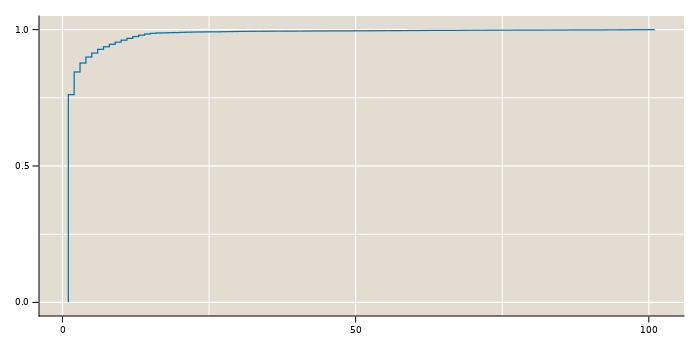

In [96]:
fig = Figure(resolution=(700, 350))
ax = Axis(fig[1, 1])

lines!(ax, sort(max_dist), 1/length(max_dist):1/length(max_dist):1)
fig

In [97]:
sum(max_dist .== 1)

11390